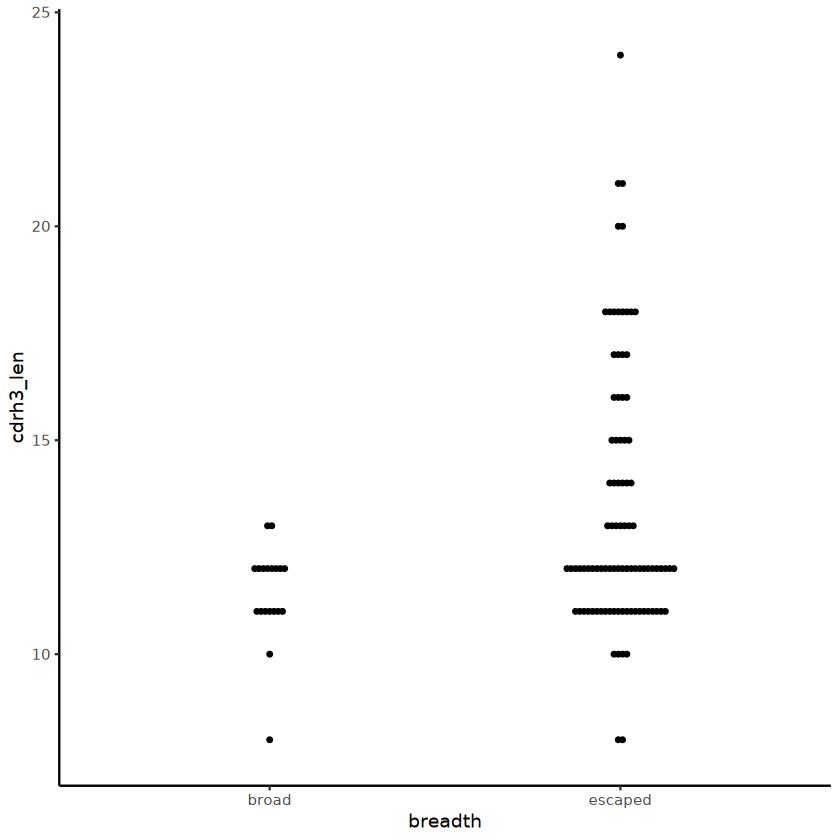

In [12]:
library(ggplot2)
library(tidyverse)

df <- read.csv("../data/_A1_breadth.csv") %>% filter(v_gene_H == "IGHV3-53" | v_gene_H == "IGHV3-66")
ggplot(df, aes(breadth, cdrh3_len))+geom_dotplot(binwidth = 0.5, stackdir = "center", dotsize = 0.2, binaxis = 'y')+theme_classic()

In [13]:
library(ggseqlogo)

df <- read.csv("../data/_A1_breadth.csv") %>% filter(v_gene_H == "IGHV3-53" | v_gene_H == "IGHV3-66") %>% mutate(
    KP3_prop = (KP3_IC50 < 0.05)
)

dev.off()
pdf("../plots/Extended/A1_CDRH1_logo.pdf", width=5, height=3)

for (prop in unique(df$breadth)){
    print(
        ggseqlogo((df%>%filter(breadth == prop & str_length(cdrh1) == 8))$cdrh1)+ggtitle(prop)
    )
}

dev.off()

pdf("../plots/Extended/A1_CDRH2_logo.pdf", width=5, height=3)

for (prop in unique(df$breadth)){
    print(
        ggseqlogo((df%>%filter(breadth == prop & str_length(cdrh2) == 7))$cdrh2)+ggtitle(prop)
    )
}

dev.off()

library(msa)

seq_align <- msa(AAStringSet(df$cdrh3), method = "ClustalOmega") %>% AAStringSet %>% as.character
df$cdrh3_aln <- seq_align
dev.off()
pdf("../plots/Extended/A1_CDRH3_logo.pdf", width=5, height=3)

for (prop in unique(df$breadth)){
    print(
        ggseqlogo((df%>%filter(breadth == prop))$cdrh3_aln)+ggtitle(prop)
    )
}
dev.off()


pdf 
  3

pdf 
  3

pdf 
  3

using Gonnet


null device 
          1

png 
  2

In [14]:
library(ggmsa)

df <- read.csv("../data/_A1_breadth.csv") %>% filter(v_gene_H == "IGHV3-53" | v_gene_H == "IGHV3-66")%>% arrange(breadth)
x <- df$seq_aa_H
names(x) <- df$id

seq_align <- msa(AAStringSet(x, use.names = T), method = "ClustalOmega", order = "input")
class(seq_align) <- "AAMultipleAlignment"

n_broad <- nrow(df%>%filter(breadth == "broad"))
aln_broad <- as(AAMultipleAlignment(unmasked(seq_align)[1:n_broad]),"AAMultipleAlignment")
aln_escaped <- as(AAMultipleAlignment(unmasked(seq_align)[(n_broad+1):nrow(df)]),"AAMultipleAlignment")

dev.off()
pdf("../plots/Extended/A1_cdr3_msa.pdf", width=8, height=10)
ggmsa(aln_broad, seq_name = T,start = 98,end = 118)+geom_seqlogo()
ggmsa(aln_escaped, seq_name = T,start = 98,end = 118)+geom_seqlogo()

dev.off()


using Gonnet


null device 
          1

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's fill values.”


png 
  2

In [15]:
dev.off()
pdf("../plots/Extended/A1_H_seq_msa.pdf", width=20, height=10)
ggmsa(seq_align, seq_name = T)+geom_seqlogo(data=seq_align)

dev.off()


null device 
          1

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's fill values.”


png 
  2

In [ ]:
# SA55-like
library(ggmsa)
library(msa)

seqH <- c(
    "BD55-3372"="EVHLVESGGGLVKPGGSLRLSCAASGFTFSNYAMNWVRQAPGKGLQWVSSITGSSSFIFYADSVKGRFTIVRDNAQNSLYLQMNSLRDEDTAVYYCARERDDYDTRLDWGQGTLVTVSS",
    "BD55-5300"="QVQLVQSGAEVKKPGSSVKVSCKASGGSFTSHAVSWVRQAPGQGLEWMGVSIPLFGTAKYAQKFQGRVTITADESTSTVYMSLSNLRSGDTAVYYCARLFPNGTPTDLTAPSDYWGQGTLVTVSS",
    "BD55-5483"="QVQLVQSGAEVKKPGSSVKVSCKASGDTFRSFALSWVRQAPGQGLEWMGVINPVFGAAHYAQKFQGRVTFIPDERTSTAYMVLSSLRSADTAVYYCARLFPSGNPDRPEDGVDVWGQGTMVTVSS",
    "BD57-5189"="QVQLVQSGAEVKKPGSSVKVSCKASGGIFSNYAISWVRQAPGQGLEWMGGIVPVFGTPNYSQEFQGRVTLTADESTSTVYMELSSLRSEDTAVYYCARDVGWQDGYYAPGLRYWGQGTLVTVSS",
    "SA55"="QVQLVQSGAEVKKPGSSVKVSCKASGGTFRSHVISWVRQAPGQGLEWMGGFIPLFGTTIYAQAFQGRVMISADESTSTAYMELSSLRSEDTAVYFCARLFPNGDPNSPEDGFDIWGQGTLVTVSA",
    "VYD222"="EVQLVESGGGLVKPGGSLRLSCAASGFTFGSYEMNWVRQAPGKGLEWVSSISEDGYSTYYPDSLKGRFTISRDSAKNSLYLQMNSLRADDTAVYYCARDFGGDTAWAGTGFTYWGQGTLVTVSS",
    "ADG20"="EVQLVESGGGLVKPGGSLRLSCAASGFTFSSYYMNWVRQAPGKGLEWVSSISEDGYSTYYPDSLKGRFTISRDSAKNSLYLQMNSLRADDTAVYYCARDFSGHTAWAGTGFEYWGQGTLVTVSS"
)

seq_align <- msa(AAStringSet(seqH, use.names = T), method = "ClustalOmega", order = "input")
class(seq_align) <- "AAMultipleAlignment"

dev.off()
pdf("../plots/Extended/SA55-like-H-align.pdf", width=15, height=5)
ggmsa(seq_align, seq_name = T)+geom_seqlogo()
dev.off()
